# Class 2. Intermediate Python & AI 

# Data Preparation

### Table of contents 

1. Data Cleaning 
    1. Remove irrelevant data
    2. Deduplicate your data
    3. Fix structural errors
    4. Deal with missing data
    5. Filter out data outliers
    6. Validate your data
2. Data Exploration
    1. Preliminary Data Processing
    2. Categorical EDA 
    3. Numerical EDA 

In [218]:
import pandas as pd

#### We are going to use a new dataset of the grades of students in certain subjects

In [219]:
df = pd.read_csv('../../datasets/exams_mod.csv')

In [220]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age
0,Male,group A,high school,standard,completed,67,67,63,1000,NaN,2022,NaN
1,Female,group D,some high school,free/reduced,none,40,59,55,1001,NaN,1970,17.0
2,Male,group E,some college,free/reduced,none,59,60,50,1002,NaN,2022,17.0
3,Male,group B,high school,standard,none,77,78,68,1003,NaN,2022,17.0
4,Male,group E,associate's degree,standard,completed,78,73,68,1004,NaN,2022,17.0


In [221]:
df.shape

(1010, 12)

In [222]:
df.describe()

,math score,reading score,writing score,id_student,address,Year,Age
count,1010.000000,1010.000000,1010.000000,1010.000000,0.0,1010.000000,905.0
mean,66.420792,68.971287,70.289109,1494.599010,NaN,2019.631683,17.0
std,15.481187,14.721537,19.125831,291.537945,NaN,10.847122,0.0
min,13.000000,27.000000,23.000000,1000.000000,NaN,1970.000000,17.0
25%,56.000000,60.000000,58.000000,1242.250000,NaN,2022.000000,17.0
50%,66.000000,70.000000,68.000000,1494.500000,NaN,2022.000000,17.0
75%,77.000000,79.000000,79.000000,1746.750000,NaN,2022.000000,17.0
max,120.000000,100.000000,100.000000,1999.000000,NaN,2022.000000,17.0


In [223]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
id_student                       int64
address                        float64
Year                             int64
Age                            float64
dtype: object

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   int64  
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          905 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 94.8+ KB


## 1. Data Cleaning

### A. Remove Irrelevant data

Look at the columns Year:

In [225]:
df['Year'].value_counts()

2022    964
1970     46
Name: Year, dtype: int64

The entries on year 1970 were introduced by mistake 

and we need to take them out of the dataset

In [226]:
df = df[df['Year'] != 1970]

In [227]:
df.shape

(964, 12)

What if the race/ethnicity group A would be irrelevant for the study. Could you build a new dataframe? 

In [228]:
etnicitiy_df = df[df['race/ethnicity'] != 'group A']

### B. Deduplicate your data

In [229]:
df.shape

(964, 12)

In [230]:
df.drop_duplicates(inplace=True)

In [231]:
df.shape

(964, 12)

### C. Fix Structural Errors

In [232]:
df['gender'].value_counts()

male      354
female    325
FEMALE     97
MALE       92
Male       51
Female     45
Name: gender, dtype: int64

In [233]:
df['gender'] = df['gender'].str.lower()
df['gender'].value_counts()

male      497
female    467
Name: gender, dtype: int64

The parental education level seems to have repeated degrees for high school. 

Can you make only one name for some highschool and high school?

In [234]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'id_student', 'address', 'Year', 'Age'],
      dtype='object')

In [235]:
df['parental level of education'].value_counts()

some college          219
associate's degree    196
high school           195
some high school      180
bachelor's degree     107
master's degree        67
Name: parental level of education, dtype: int64

In [236]:
df['parental level of education'].replace('some high school', 'high school').value_counts()

high school           375
some college          219
associate's degree    196
bachelor's degree     107
master's degree        67
Name: parental level of education, dtype: int64

### D. Missing values

Look at the columns address all of the values are missing

In [237]:
df.isna().sum()

gender                           0
race/ethnicity                   0
parental level of education      0
lunch                            0
test preparation course          0
math score                       0
reading score                    0
writing score                    0
id_student                       0
address                        964
Year                             0
Age                            103
dtype: int64

In [238]:
df.drop(['address'], axis=1, inplace=True)

In [239]:
df['Age'].mean()

17.0

In [240]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [241]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
id_student                     0
Year                           0
Age                            0
dtype: int64

### E. Data Outliers

In [242]:
df.describe()

,math score,reading score,writing score,id_student,Year,Age
count,964.000000,964.000000,964.000000,964.000000,964.0,964.0
mean,66.290456,68.874481,70.181535,1494.534232,2022.0,17.0
std,15.340668,14.715644,19.079852,290.462073,0.0,0.0
min,13.000000,27.000000,23.000000,1000.000000,2022.0,17.0
25%,56.000000,59.750000,58.000000,1242.750000,2022.0,17.0
50%,66.000000,70.000000,68.000000,1494.500000,2022.0,17.0
75%,77.000000,79.000000,79.000000,1746.250000,2022.0,17.0
max,120.000000,100.000000,100.000000,1999.000000,2022.0,17.0


In [243]:
df[df['math score'] > 100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,Year,Age
11,female,group D,high school,standard,completed,120,87,100,1011,2022,17.0


In [244]:
df.drop(labels=[11], axis=0, inplace=True)

In [245]:
df.describe()

,math score,reading score,writing score,id_student,Year,Age
count,963.000000,963.000000,963.000000,963.000000,963.0,963.0
mean,66.234683,68.855659,70.150571,1495.036345,2022.0,17.0
std,15.250540,14.711676,19.065517,290.194113,0.0,0.0
min,13.000000,27.000000,23.000000,1000.000000,2022.0,17.0
25%,56.000000,59.500000,58.000000,1243.500000,2022.0,17.0
50%,66.000000,70.000000,68.000000,1495.000000,2022.0,17.0
75%,77.000000,79.000000,79.000000,1746.500000,2022.0,17.0
max,100.000000,100.000000,100.000000,1999.000000,2022.0,17.0


## 2. Data Exploration

### A. Preliminary Data Processing

In [246]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,Year,Age
0,male,group A,high school,standard,completed,67,67,63,1000,2022,17.0
2,male,group E,some college,free/reduced,none,59,60,50,1002,2022,17.0
3,male,group B,high school,standard,none,77,78,68,1003,2022,17.0
4,male,group E,associate's degree,standard,completed,78,73,68,1004,2022,17.0
5,female,group D,high school,standard,none,63,77,76,1005,2022,17.0


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 1009
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       963 non-null    object 
 1   race/ethnicity               963 non-null    object 
 2   parental level of education  963 non-null    object 
 3   lunch                        963 non-null    object 
 4   test preparation course      963 non-null    object 
 5   math score                   963 non-null    int64  
 6   reading score                963 non-null    int64  
 7   writing score                963 non-null    int64  
 8   id_student                   963 non-null    int64  
 9   Year                         963 non-null    int64  
 10  Age                          963 non-null    float64
dtypes: float64(1), int64(5), object(5)
memory usage: 90.3+ KB


In [248]:
df['id_student'] = df['id_student'].astype('str')

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 1009
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       963 non-null    object 
 1   race/ethnicity               963 non-null    object 
 2   parental level of education  963 non-null    object 
 3   lunch                        963 non-null    object 
 4   test preparation course      963 non-null    object 
 5   math score                   963 non-null    int64  
 6   reading score                963 non-null    int64  
 7   writing score                963 non-null    int64  
 8   id_student                   963 non-null    object 
 9   Year                         963 non-null    int64  
 10  Age                          963 non-null    float64
dtypes: float64(1), int64(4), object(6)
memory usage: 90.3+ KB


### B. Categorical EDA 

<AxesSubplot:>

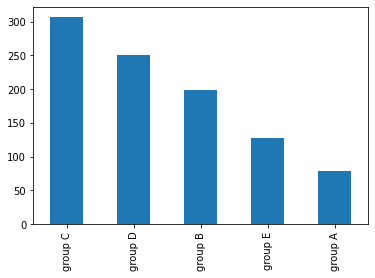

In [250]:
df['race/ethnicity'].value_counts().plot(kind='bar')

<AxesSubplot:>

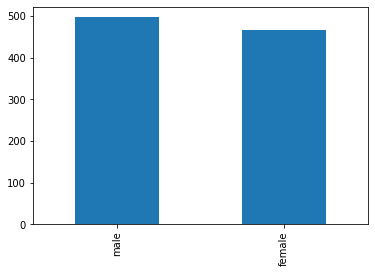

In [251]:
df['gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

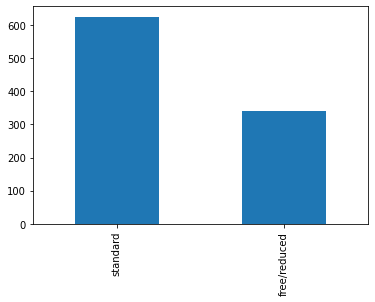

In [252]:
df['lunch'].value_counts().plot(kind='bar')

<AxesSubplot:>

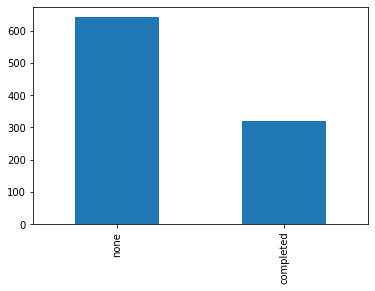

In [257]:
df['test preparation course'].value_counts().plot(kind='bar')

### C. Numerical EDA

#### a. Distributions

In [253]:
df.describe()

,math score,reading score,writing score,Year,Age
count,963.000000,963.000000,963.000000,963.0,963.0
mean,66.234683,68.855659,70.150571,2022.0,17.0
std,15.250540,14.711676,19.065517,0.0,0.0
min,13.000000,27.000000,23.000000,2022.0,17.0
25%,56.000000,59.500000,58.000000,2022.0,17.0
50%,66.000000,70.000000,68.000000,2022.0,17.0
75%,77.000000,79.000000,79.000000,2022.0,17.0
max,100.000000,100.000000,100.000000,2022.0,17.0


<AxesSubplot:ylabel='Frequency'>

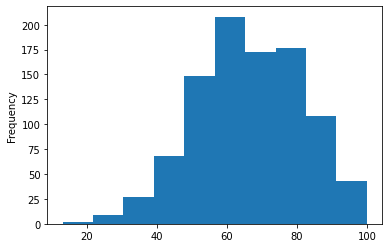

In [254]:
df['math score'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

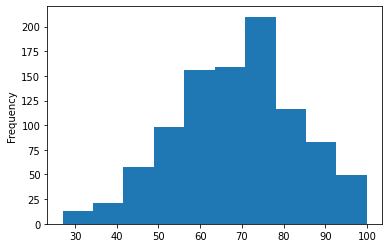

In [255]:
df['reading score'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

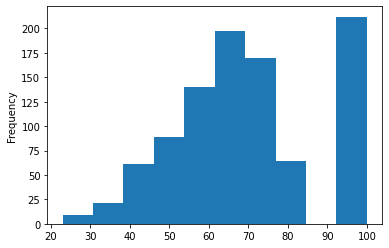

In [256]:
df['writing score'].plot(kind='hist')

#### Save dataset that you have been modifying

In [258]:
df.to_csv('../../datasets/exams_mod_cleaned.csv', index=None)